In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from helperfun import plot_decision_boundary

2024-06-28 15:09:16.338972: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 15:09:16.339338: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 15:09:16.342529: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 15:09:16.377397: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 15:09:17.003110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

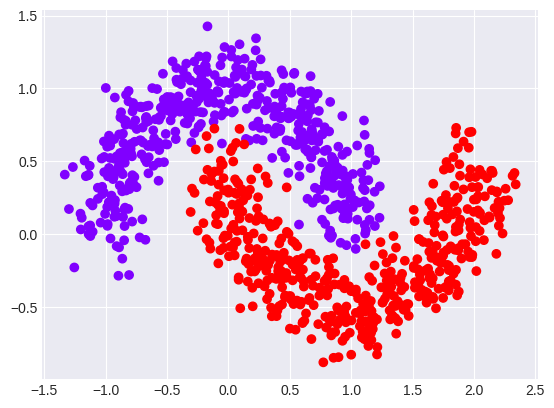

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.15, random_state=32)

plt.style.use("seaborn-v0_8-darkgrid")
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="rainbow")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [3]:
moons_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softplus),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

moons_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = moons_model.fit(tf.expand_dims(X_train, -1), y_train, epochs=50, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


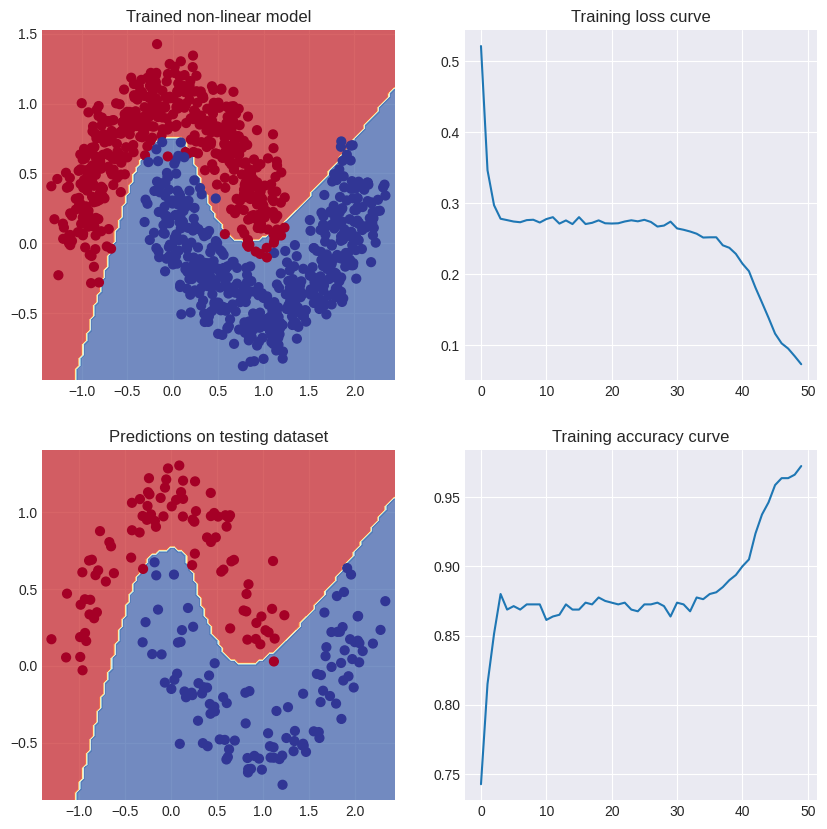

In [4]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Trained non-linear model")
plot_decision_boundary(moons_model, X, y)

plt.subplot(2, 2, 2)
plt.title("Training loss curve")
plt.plot(history.history["loss"])

plt.subplot(2, 2, 3)
plt.title("Predictions on testing dataset")
plot_decision_boundary(moons_model, X_test, y_test)

plt.subplot(2, 2, 4)
plt.title("Training accuracy curve")
plt.plot(history.history["accuracy"])